In [12]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from scipy.ndimage import binary_closing, map_coordinates


# Bài 1 - Chọn LangBiang, tịnh tiến 100px và phân ngưỡng Otsu 0.3

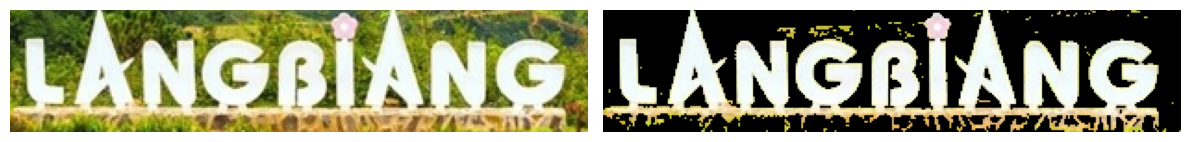

In [13]:
image = cv2.imread("exercise/dalat.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
x, y, w, h = 126, 268, 312, 66
crop = image[y:y+h, x:x+w]
gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
segmented = cv2.bitwise_and(crop, crop, mask=mask)
cv2.imwrite("lang_biang.jpg", segmented)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.tight_layout()
plt.show()


# Bài 2 - Hồ Xuân Hương: xoay 45 độ và adaptive threshold

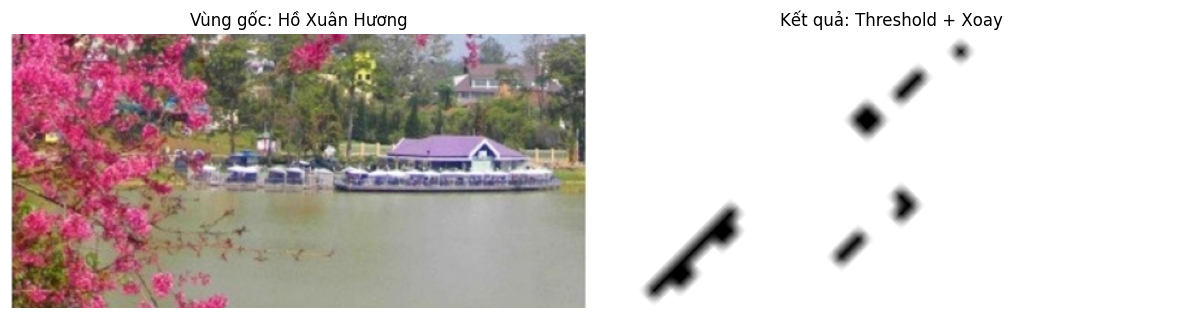

In [14]:
image = cv2.imread("exercise/dalat.jpg")
x, y, w, h = 510, 447, 480, 228
crop = image[y:y+h, x:x+w]
gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 11, 60)


(h_crop, w_crop) = adaptive.shape
center = (w_crop // 2, h_crop // 2)
M = cv2.getRotationMatrix2D(center, 45, 10)
rotated = cv2.warpAffine(adaptive, M, (w_crop, h_crop), borderValue=255)

cv2.imwrite("ho_xuan_huong.jpg", rotated)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.title("Vùng gốc: Hồ Xuân Hương")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rotated, cmap='gray')
plt.title("Kết quả: Threshold + Xoay")
plt.axis("off")

plt.tight_layout()
plt.show()

# Bài 3 - Quảng trường Lâm Viên với coordinate mapping và closing

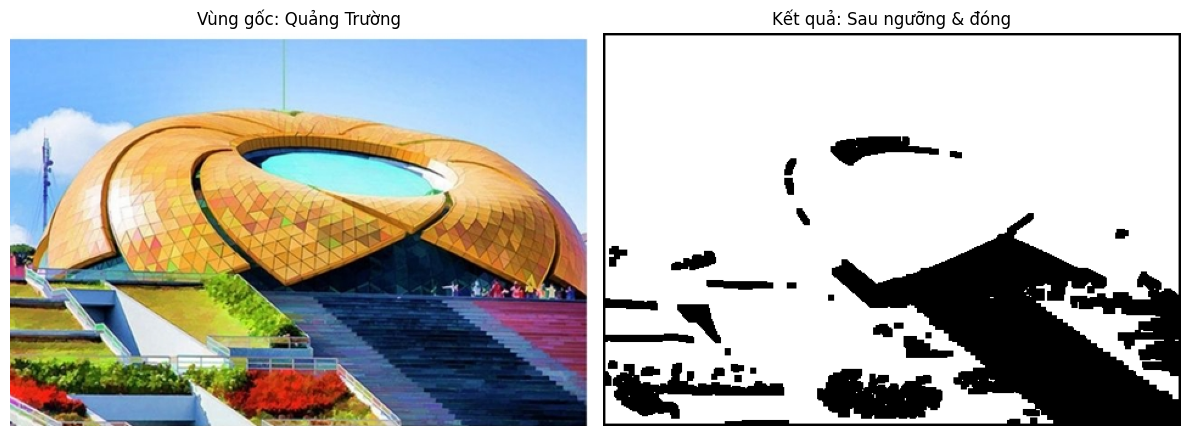

In [15]:
image = cv2.imread("exercise/dalat.jpg")
x, y, w, h = 1006, 19, 475, 323
crop = image[y:y+h, x:x+w]

gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
normalized = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)
thresholded = (normalized > 100).astype(np.uint8) * 255
closed = binary_closing(thresholded, structure=np.ones((5, 5))).astype(np.uint8) * 255

# Lưu kết quả ra file
cv2.imwrite("quang_truong_lam_vien.jpg", closed)

# Hiển thị kết quả
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.title("Vùng gốc: Quảng Trường")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(closed, cmap='gray')
plt.title("Kết quả: Sau ngưỡng & đóng")
plt.axis("off")

plt.tight_layout()
plt.show()

# Bài 4 - viết menu

======== MENU CHÍNH ========
1. Geometric Transformation
2. Segment
Chọn 1 nhóm chức năng để xử lý ảnh.


Bạn đã chọn: Geometric Transformation
  1. Coordinate Mapping
  2. Rotate
  3. Scale
  4. Shift
--> Bạn đã chọn Geometric Transformation -> lựa chọn 1

------ Hiển thị ảnh đã xử lý ------
1 - LangBiang
2 - Hồ Xuân Hương
3 - Quảng Trường Lâm Viên


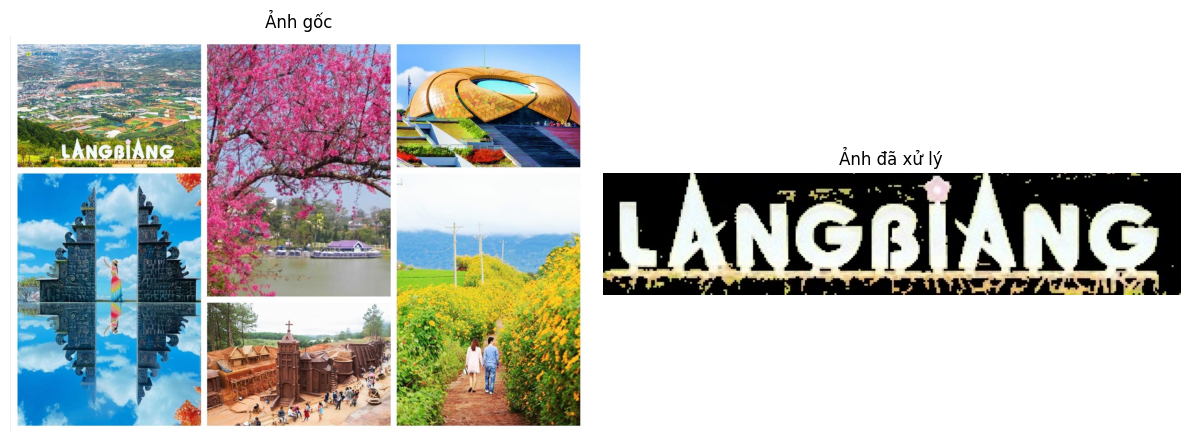

In [17]:
import cv2
import matplotlib.pyplot as plt

# ===== MENU FUNCTIONS =====
def geometric_transformation_menu():
    print("\nBạn đã chọn: Geometric Transformation")
    print("  1. Coordinate Mapping")
    print("  2. Rotate")
    print("  3. Scale")
    print("  4. Shift")

def segment_menu():
    print("\nBạn đã chọn: Segment")
    print("  1. Adaptive Thresholding")
    print("  2. Binary Dilation")
    print("  3. Binary Erosion")
    print("  4. Otsu Thresholding")

def run_menu():
    print("======== MENU CHÍNH ========")
    print("1. Geometric Transformation")
    print("2. Segment")
    print("Chọn 1 nhóm chức năng để xử lý ảnh.\n")

    main_choice = input("Chọn nhóm chức năng (1 hoặc 2): ").strip()

    if main_choice == '1':
        geometric_transformation_menu()
        sub_choice = input("Chọn chức năng Geometric Transformation (1-4): ").strip()
        print(f"--> Bạn đã chọn Geometric Transformation -> lựa chọn {sub_choice}")
        # TODO: Thêm gọi hàm thực hiện tương ứng như rotate(), shift()...

    elif main_choice == '2':
        segment_menu()
        sub_choice = input("Chọn chức năng Segment (1-4): ").strip()
        print(f"--> Bạn đã chọn Segment -> lựa chọn {sub_choice}")
        # TODO: Thêm gọi hàm tương ứng như adaptive_thresholding()...

    else:
        print("Lựa chọn không hợp lệ!")

# ===== SHOW RESULT FUNCTION =====
def show_images(original_path, processed_path):
    original = cv2.imread(original_path)
    processed = cv2.imread(processed_path, cv2.IMREAD_UNCHANGED)
    
    if len(processed.shape) == 2:
        processed_show = processed
        cmap = 'gray'
    else:
        processed_show = cv2.cvtColor(processed, cv2.COLOR_BGR2RGB)
        cmap = None
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh gốc")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(processed_show, cmap=cmap)
    plt.title("Ảnh đã xử lý")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# ===== THỰC THI CHƯƠNG TRÌNH =====
if __name__ == "__main__":
    run_menu()

    print("\n------ Hiển thị ảnh đã xử lý ------")
    print("1 - LangBiang")
    print("2 - Hồ Xuân Hương")
    print("3 - Quảng Trường Lâm Viên")

    choice = input("Nhập lựa chọn (1/2/3): ")

    if choice == "1":
        show_images("exercise/dalat.jpg", "lang_biang.jpg")
    elif choice == "2":
        show_images("exercise/dalat.jpg", "ho_xuan_huong.jpg")
    elif choice == "3":
        show_images("exercise/dalat.jpg", "quang_truong.jpg")
    else:
        print("Lựa chọn không hợp lệ.")
